In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
# DataFrame fixed sensors
df = pd.read_csv(r"./assets/Dataset_allVariables.csv", sep=",", low_memory=False)
df = df.drop(['Unnamed: 0'], axis=1)
#Data to DateTime variable
df['date'] =  pd.to_datetime(df['date'], format="%Y-%m-%d")
df.shape

(47874, 40)

In [12]:
df.columns

Index(['zone_id', 'nom_capteur', 'Quartier', 'shop', 'id_capteur_quartier',
       'type_capteur', 'address', 'zipcode', 'city', 'longitude', 'latitude',
       'date', 'year', 'Mois', 'Jour_semaine', 'Somme par jour', 'day_part',
       'Sum_part_day', 'Coef_Var', 'Coef_Var_perDay', 'avg_visits_perDay',
       'avg_visits_perSensor', 'avg_visits_perDay_perSensor',
       'avg_visits_partOfDay_perSensor', 'public_holidays_flag',
       'school_holidays_flag', 'startdate', 'enddate', 'weather_date', 'main',
       'temperature', 'temperaturefeelslike', 'temperaturemin',
       'temperaturemax', 'pressure', 'humidity', 'visibility', 'windspeed',
       'rain', 'snow'],
      dtype='object')

In [13]:
# Select columns 
df = df.loc[:,['zone_id', 'date', 'year', 'Mois', 'Jour_semaine', 'Somme par jour', 'avg_visits_perDay', 'Quartier', 'shop', 'temperature', 'main']] #'avg_visitors_perDay'
# Sort DataFrame
df.sort_values(by=['zone_id', 'date'])
# Drop duplicates
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(15958, 11)

In [14]:
df.set_index('zone_id', inplace=True)

### Group by number of visitors for plotting 

In [15]:
# Descriptive statistics per sensor
zone_stat = df.groupby('zone_id')['Somme par jour'].describe()

list_df = []
# average number of visitors higher than 20000
list1 = zone_stat.index[(zone_stat['mean'] >= 20000)].tolist()
plot1 = df.loc[list1, : ].reset_index()
list_df.append(plot1)
# average number of visitors between 10000 and 19.999
list2 = zone_stat.index[(zone_stat['mean'] >= 10000) & (zone_stat['mean'] < 20000)].tolist()
plot2 = df.loc[list2, : ].reset_index()
list_df.append(plot2)
# average number of visitors between 5000 and 9.999
list3 = zone_stat.index[(zone_stat['mean'] >= 5000) & (zone_stat['mean'] < 10000)].tolist()
plot3 = df.loc[list3, : ].reset_index()
list_df.append(plot3)
# average number of visitors less than 5000
list4 = zone_stat.index[(zone_stat['mean'] < 5000) ].tolist()
plot4 = df.loc[list4, : ].reset_index()
list_df.append(plot4)


### Plot function

In [16]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .01, f"number days: {n}", horizontalalignment='center', fontsize=9, transform=ax.transAxes)
    quartier = data.iloc[0, 7]
    shop = data.iloc[0, 8]
    #zone = data.iloc[0, 0]
    ax.text(.5, .95, f"{quartier} - {shop}", horizontalalignment='center', fontsize=9, transform=ax.transAxes)

def display_plot(list_df):
    y=1
    for df in list_df:
        g = sns.FacetGrid(df, col='zone_id', col_wrap=4)
        order=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        g.map_dataframe(sns.boxplot, x='Jour_semaine', y='Somme par jour', order=order)
        g.set_titles(col_template="Zone {col_name}" )  
        g.set_xlabels(label='Weekday')
        g.set_ylabels(label='Visitors')
        g.map_dataframe(annotate)
        g.set_xticklabels(rotation=45, fontsize=9)
        g.tight_layout()
        plt.savefig("./assets/plot" + str(y) + ".png")
        y+=1

        

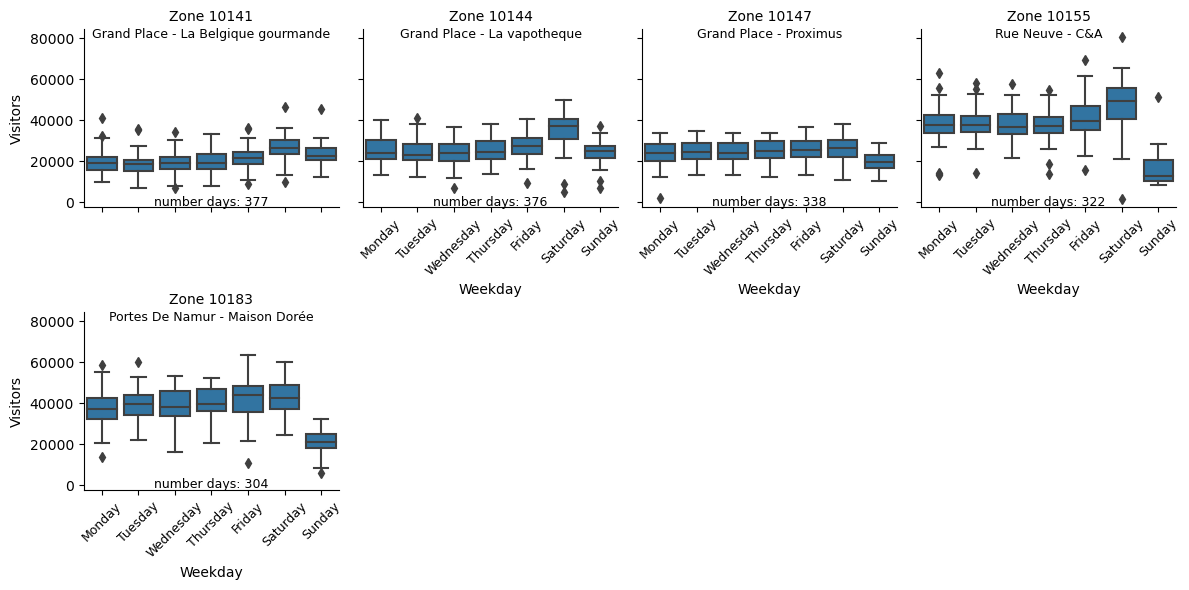

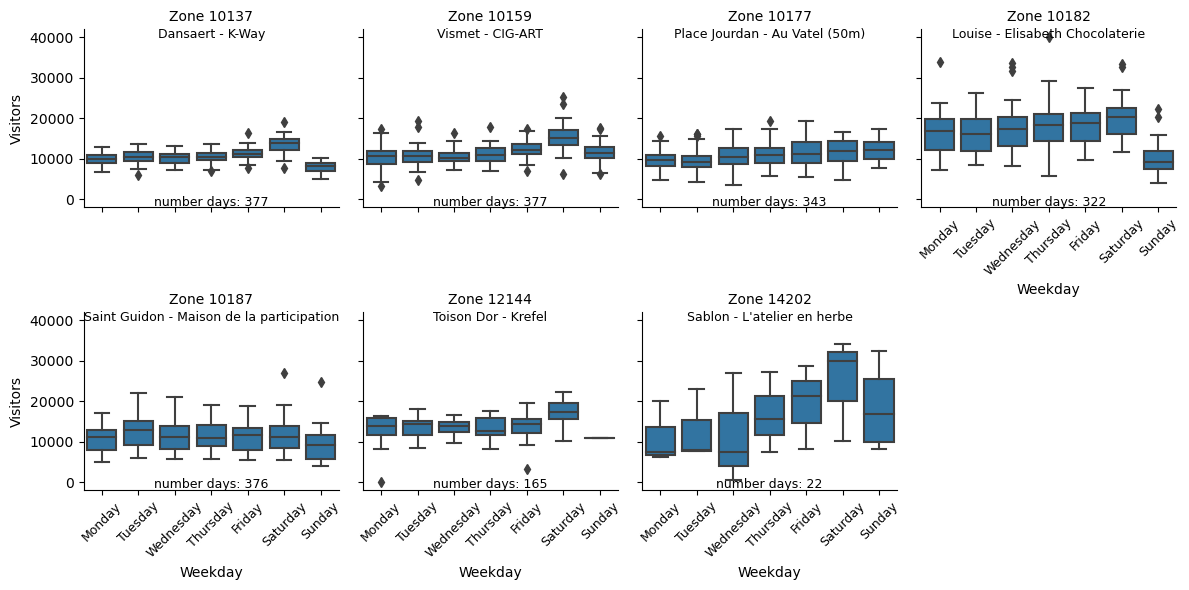

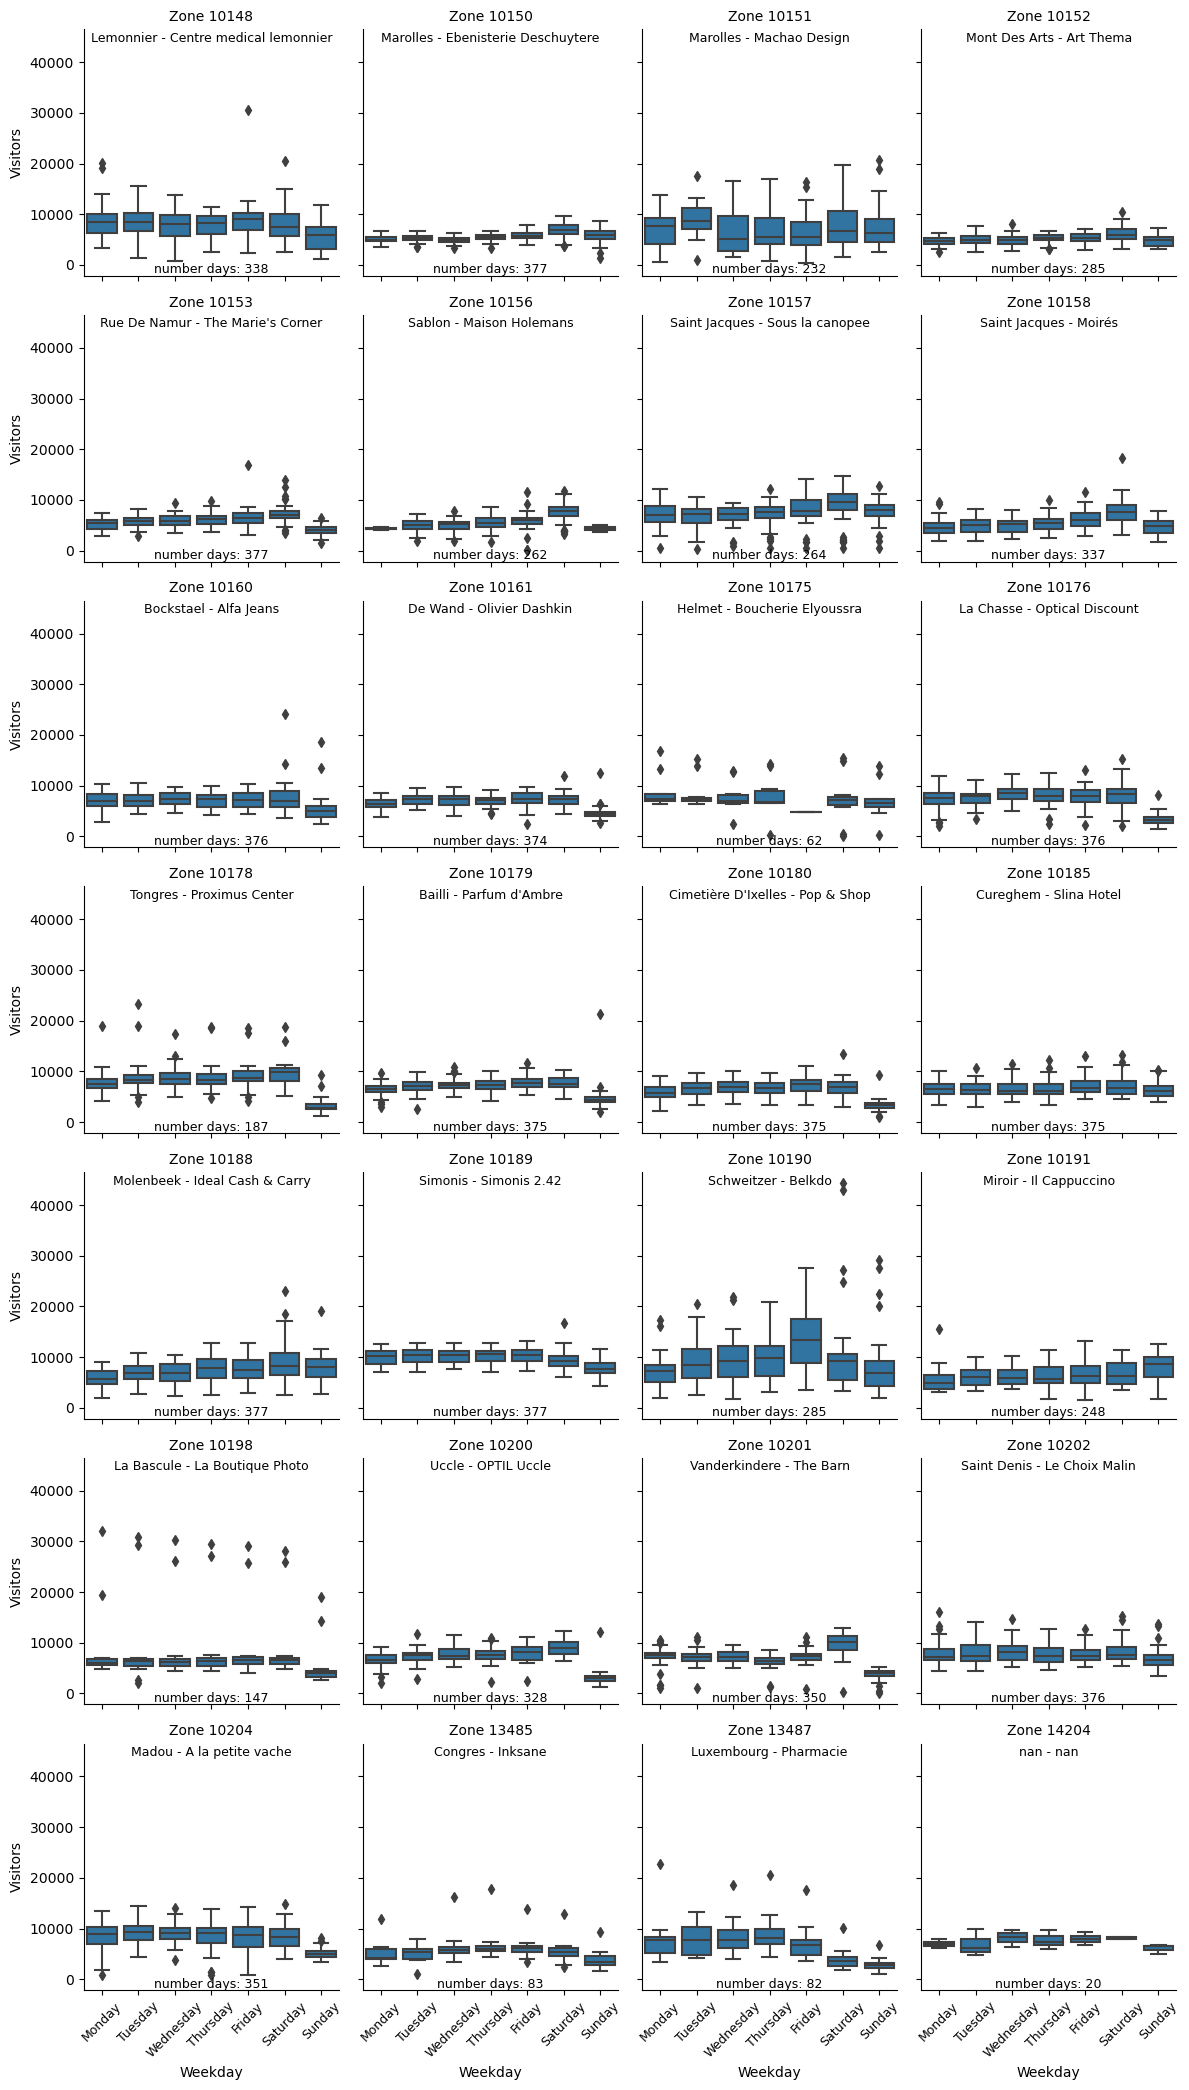

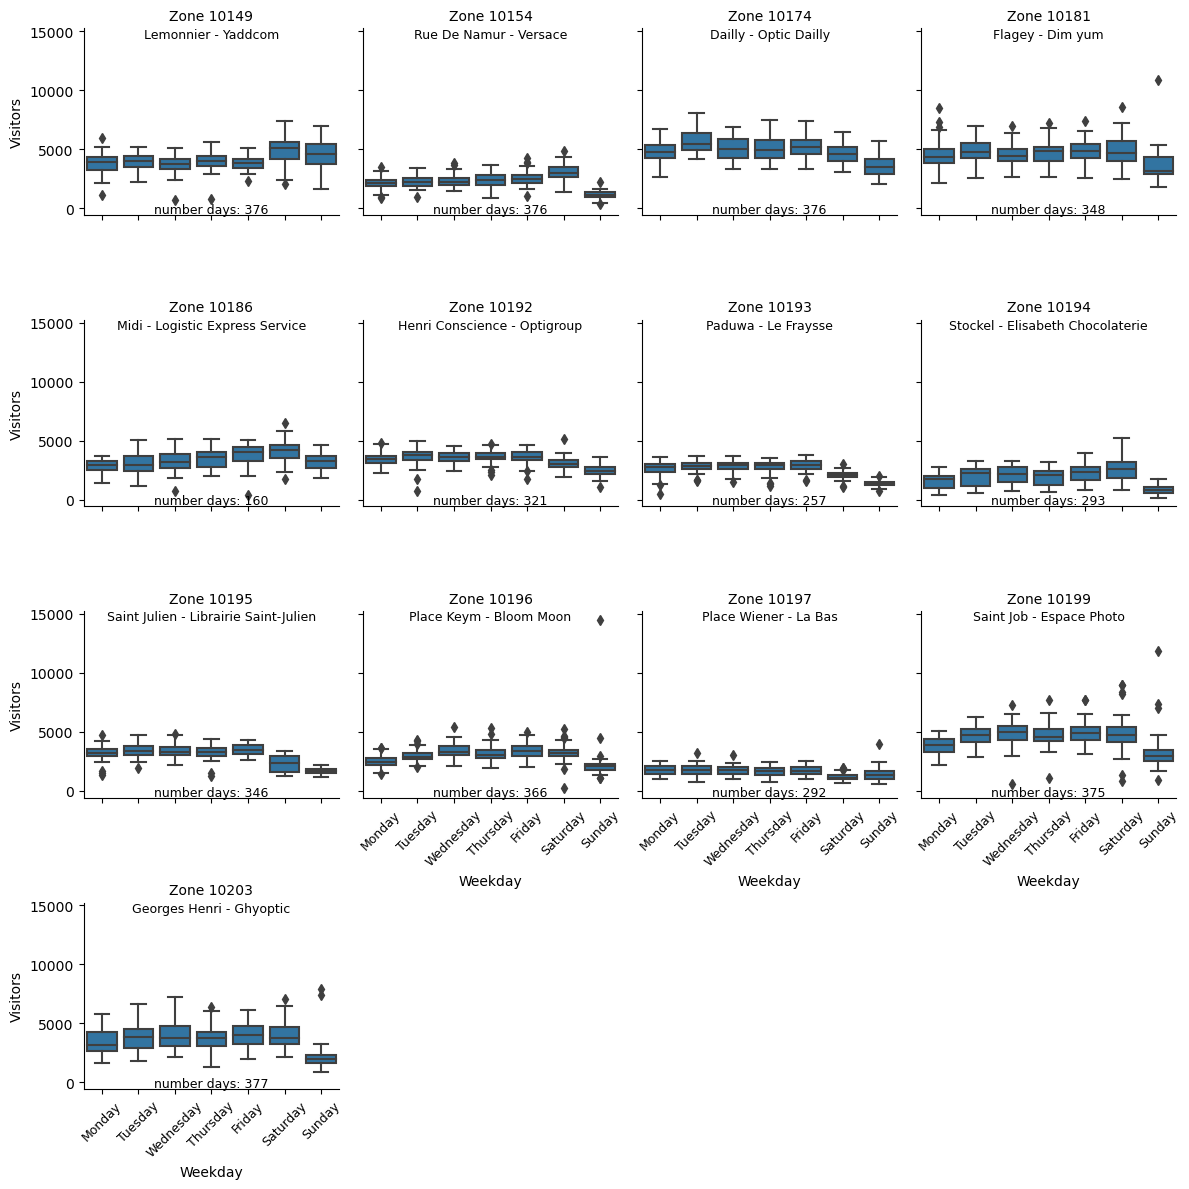

In [17]:
# Call the function
plot = display_plot((list_df))

## Plot visitors and temperature variables

In [8]:
temp = df.groupby(['date']).temperature.mean().reset_index()
visits = df.groupby(['date']).avg_visits_perDay.mean().reset_index()

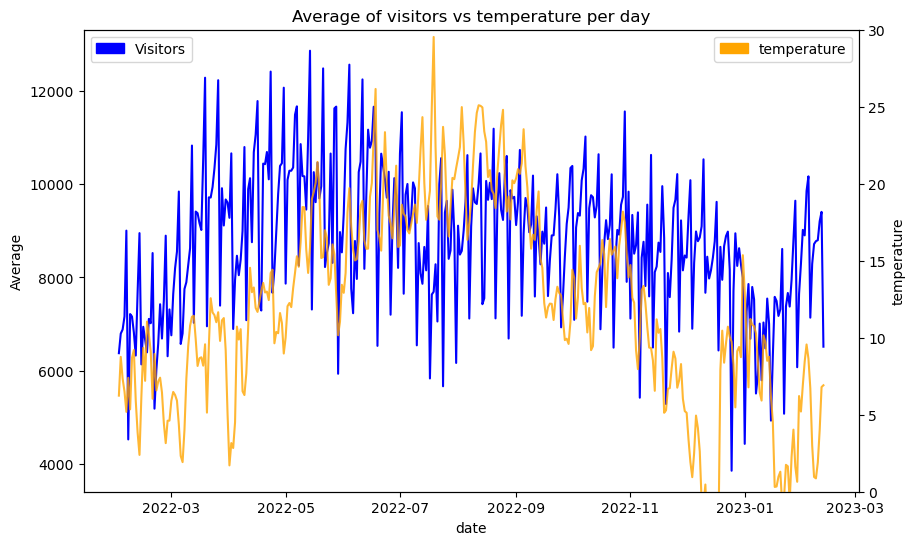

In [9]:
# Plot chart with two axes
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))

# plot line graph on axis #1
ax1 = sns.lineplot(
    x=visits.date, 
    y=visits.avg_visits_perDay, 
    data=visits, 
    sort=False, 
    color='blue',
)
ax1.set_ylabel('Average')
#ax1.set_ylim(0, 14000)
ax1_patch = mpatches.Patch(color='blue', label='Visitors')
ax1.legend(handles=[ax1_patch], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.lineplot(
    x=temp.date, 
    y=temp.temperature, 
    data=temp, 
    color='orange', 
    alpha=0.8, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('temperature')
ax2.set_ylim(0, 30)
ax2_patch = mpatches.Patch(color='orange', label='temperature')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax2.set_title('Average of visitors vs temperature per day')
plt.savefig("./assets/avgVisits_vs_temperature.png")
plt.show()


## Plot average visitors and main temperature

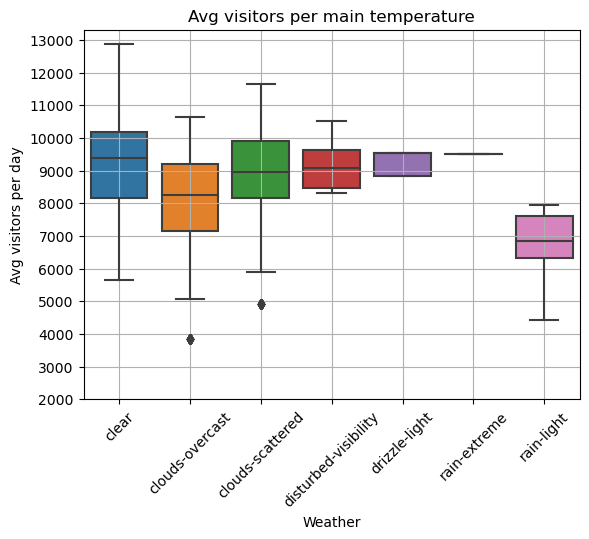

In [11]:
order = ['clear', 'clouds-overcast', 'clouds-scattered', 'disturbed-visibility', 'drizzle-light', 'rain-extreme', 'rain-light']
ax = sns.boxplot(data=df, x='main', y='avg_visits_perDay', order=order)
ax.grid(True)
ax.set_xlabel('Weather')
ax.set_ylabel('Avg visitors per day')
start, end = ax.get_ylim()
ax.set_yticks(np.arange(2000, 13500, 1000))

plt.xticks(rotation = 45)
plt.title('Avg visitors per main temperature')
plt.show()

In [12]:
df.groupby(['main']).date.nunique()

main
clear                   201
clouds-overcast          74
clouds-scattered         85
disturbed-visibility      6
drizzle-light             2
rain-extreme              1
rain-light                8
Name: date, dtype: int64